##### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 2: Sentiment Classification of Tweets

This is a sample code to assist you with vectorising the 'Train' dataset for your assignment 2.

First we read the CSV datafiles (Train and Test).

In [3]:
import re
import time

# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier


In [4]:
# read data from csv file
train_data = pd.read_csv("Train.csv", sep=',')
test_data = pd.read_csv("Test.csv", sep=',')

### Text Preprocessing

In [5]:


#separating instance and label for Train
X_train_raw = [x[0] for x in train_data[['text']].values]
Y_train = [x[0] for x in train_data[['sentiment']].values]

In [6]:
def preprocess(text: str) -> str:
    replacements = {
        # Replace links wih URL
        r'(http\S+)': 'URL',

        # Replace @'s with USERNAME
        r'@[A-Za-z0-9]+': 'USERNAME',

        # Replace characters repeated more than with two of the characters
        r'([a-zA-Z])(\1{2,})': '\\1\\1',

        # Remove incorrectly encoded emojis.
        r'...': '',

        '[0-9]+': '',
    }
    for original, replace in replacements.items():
        text = re.sub(original, replace, text)
    return text

# data cleaning

X_test_raw = test_data['text'].apply(preprocess)
X_test_raw = X_test_raw.apply(preprocess)

#check the result
print("Test length:", len(X_test_raw))

Test length: 6099


### Training test splitting

In [7]:
# hold out with test size 0.3
X_train, X_test, y_train, y_test = train_test_split(X_train_raw, Y_train,
                                                    test_size=0.3,
                                                    random_state=30)

In [8]:
# BoW applied on testing data, training data and develop data
BoW_vectorizer = CountVectorizer()
X_train_BoW = BoW_vectorizer.fit_transform(X_train_raw)
X_test_BoW = BoW_vectorizer.transform(X_test_raw)
x_train_BoW = BoW_vectorizer.fit_transform(X_train)
x_test_BoW = BoW_vectorizer.transform(X_test)

In [9]:
# fit into linear models
models = [DummyClassifier(strategy='most_frequent'),
          MultinomialNB(),
          LinearSVC(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LogisticRegression()]
titles = ['Zero-R',
          'MNB',
          'LinearSVC',
          'Decision Tree',
          'KNN',
          'Logistic Regression']

for title, model in zip(titles, models):
    start = time.time()
    model.fit(x_train_BoW.todense(), y_train)
    end = time.time()
    t = end - start
    acc = model.score(x_test_BoW.todense(), y_test)
    print(title, "Accuracy:", acc, 'Time:', t)

Zero-R Accuracy: 0.5882892524078887 Time: 1.8226439952850342


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


MNB Accuracy: 0.6595321816236049 Time: 43.08611488342285


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearSVC Accuracy: 0.6280385262192325 Time: 16.387268781661987


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Decision Tree Accuracy: 0.5650512154104876 Time: 576.2602138519287


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


KNN Accuracy: 0.5442592875707079 Time: 0.5134201049804688


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/va

Logistic Regression Accuracy: 0.6622840544259287 Time: 99.10091280937195


### Feature selecting

In [10]:
# Tfidf Vectorizer
vectorizer = TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

lr = LogisticRegression(C=1).fit(tf_x_train, y_train)
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(tf_x_train, y_train)
    print("Accuracy for C=%s: %s"
          % (c, accuracy_score(y_test, lr.predict(tf_x_test))))

mnb = MultinomialNB().fit(tf_x_train, y_train)
print(mnb.score(tf_x_test, y_test))

clf = LinearSVC(random_state=0)
clf.fit(tf_x_train, y_train)
print(clf.score(tf_x_test, y_test))


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.01: 0.5882892524078887
Accuracy for C=0.05: 0.6051062528665342
Accuracy for C=0.25: 0.6509707995719309


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.5: 0.6667176272741171


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=1: 0.6754318911481425
0.5966977526372115
0.663812872649442


In [11]:
vectorizer = TfidfVectorizer()
tf_X_train = vectorizer.fit_transform(X_train_raw)
tf_X_test = vectorizer.transform(X_test_raw)

model_lr = LogisticRegression(multi_class='ovr')
model_lr.fit(tf_X_train, Y_train)

prediction = model_lr.predict(tf_X_test.todense())
pre = pd.DataFrame(prediction, columns=['sentiment'], index=test_data['id'])
pre.index.name = 'id'
pre.to_csv(r"tfidf_prediction_cv.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [12]:
# apply k best on tfidf 
kbest = SelectKBest(chi2, k=500).fit(tf_x_train, y_train)
kbest_train_x = kbest.transform(tf_x_train)
kbest_test_x = kbest.transform(tf_x_test)

mnb = MultinomialNB().fit(kbest_train_x, y_train)
print(mnb.score(kbest_test_x, y_test))

clf = LinearSVC(random_state=0)
clf.fit(kbest_train_x, y_train)
print(clf.score(kbest_test_x, y_test))

final_tfidf = LogisticRegression(C=1)
final_tfidf.fit(kbest_train_x, y_train)
print(final_tfidf.score(kbest_test_x, y_test))

0.6104571166488304
0.672374254701116
0.6654945726953065


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# save the created vocabulary for the given dataset in a separate file
vocab_dict = BoW_vectorizer.vocabulary_
output_pd = pd.DataFrame(list(vocab_dict.items()), columns=['word', 'count'])
output_pd.T.to_csv('BoW-vocab.csv', index=False)

In [14]:
# apply k best on BoW 
kbest = SelectKBest(chi2, k=500).fit(X_train_BoW, Y_train)
kbest_train_X = kbest.transform(X_train_BoW)
kbest_test_X = kbest.transform(X_test_BoW)

# training dataset
kbest = SelectKBest(chi2, k=700).fit(x_train_BoW, y_train)
kbest_train_x = kbest.transform(x_train_BoW)
kbest_test_x = kbest.transform(x_test_BoW)

In [15]:
# training and development set
x_train = kbest_train_x
x_test = kbest_test_x
# training and testing set
X_train = kbest_train_X
X_test = kbest_test_X

### Model Adapting

In [16]:
# Use the 10_fold_Cross_Validation with 4 models(LinearSVC, Decision Tree, KNN, Logistic Regression)
models = [LinearSVC(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LogisticRegression()]
titles = ['LinearSVC',
          'Decision Tree',
          'KNN',
          'Logistic Regression']

for title, model in zip(titles, models):
    start = time.time()
    acc = np.mean(cross_val_score(model, x_train, y_train, cv=20))
    end = time.time()
    t = end - start
    print(title, "Accuracy:", acc, 'time:', t)

for title, model in zip(titles, models):
    start = time.time()
    acc = np.mean(cross_val_score(model, x_test, y_test, cv=20))
    end = time.time()
    t = end - start
    print(title, "Accuracy:", acc, 'time:', t)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the numb

LinearSVC Accuracy: 0.6842936225837662 time: 59.74351382255554
Decision Tree Accuracy: 0.55566395394317 time: 27.508986949920654
KNN Accuracy: 0.5794503475534025 time: 7.730791091918945


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Logistic Regression Accuracy: 0.6837034165219956 time: 10.845067977905273


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC Accuracy: 0.6606017378981128 time: 15.958253860473633
Decision Tree Accuracy: 0.5450254531215036 time: 6.925014019012451
KNN Accuracy: 0.578353192362199 time: 1.554731845855713


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Logistic Regression Accuracy: 0.6621321884090401 time: 5.520104885101318


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Parameter Tuning

## LinearSVC

In [17]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-2, 2, 10)
train_scores, valid_scores = validation_curve(LinearSVC(), x_train, y_train,
                                              param_name='C',
                                              param_range=param_range, cv=5,
                                              n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  50 | elapsed:    3.6s remaining:   55.6s
[Parallel(n_jobs=-1)]: Done   9 out of  50 | elapsed:    5.7s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:   12.6s remaining:   29.5s
[Parallel(n_jobs=-1)]: Done  21 out of  50 | elapsed:   13.4s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:   14.4s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed:   15.7s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:   21.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:   22.8s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   23.4s finished


In [18]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)
std_valid_scores = np.std(valid_scores, axis=1)

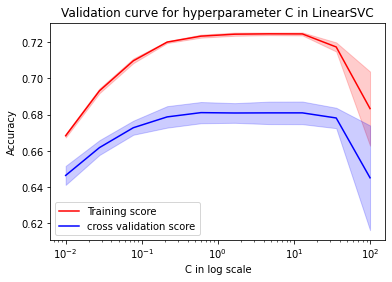

0.5994842503189409

In [19]:
plt.semilogx(param_range, mean_train_scores, label="Training score",
             color='red')
plt.fill_between(param_range, mean_train_scores - std_train_scores,
                 mean_train_scores + std_train_scores, alpha=0.2, color="red")

plt.semilogx(param_range, mean_valid_scores, label="cross validation score",
             color='blue')
plt.fill_between(param_range, mean_valid_scores - std_valid_scores,
                 mean_valid_scores + std_valid_scores, alpha=0.2, color="blue")

plt.legend(loc='best')
plt.title("Validation curve for hyperparameter C in LinearSVC")
plt.xlabel("C in log scale")
plt.ylabel("Accuracy")
plt.show()

best_C = param_range[mean_valid_scores.argmax()]
best_C

## rbf SVC

In [20]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
              "C": [10, 100, 1000, 10000]}

grd = GridSearchCV(estimator=SVC(), param_grid=parameters, n_jobs=-1, cv=3)

grd.fit(x_train, y_train)
print(grd.best_params_)

#
svc_rbf = SVC(kernel="rbf", gamma=0.001, C=1000).fit(x_train, y_train)
print(grd.best_score_)
print(svc_rbf.score(x_train, y_train))
print(svc_rbf.score(x_test, y_test))
print(classification_report(y_train, svc_rbf.predict(x_train)))


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.6785924906624731
0.7293755324028569
0.6630484635376853
              precision    recall  f1-score   support

    negative       0.76      0.46      0.57      2616
     neutral       0.71      0.90      0.80      8811
    positive       0.77      0.52      0.62      3834

    accuracy                           0.73     15261
   macro avg       0.75      0.63      0.66     15261
weighted avg       0.74      0.73      0.71     15261



In [21]:
# Instantiate SVC
param_range = np.logspace(-2, 2, 10)
train_scores_rbf, valid_scores_rbf = validation_curve(
    SVC(max_iter=10000, kernel="rbf", gamma=0.001),
    x_train,
    y_train,
    param_name='C',
    param_range=param_range,
    cv=3,
    n_jobs=-1, verbose=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  30 | elapsed:   35.4s remaining:  5.3min
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:   36.6s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:   37.5s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:   37.9s remaining:   37.9s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.1min remaining:   37.9s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.1min remaining:   20.4s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.1min remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


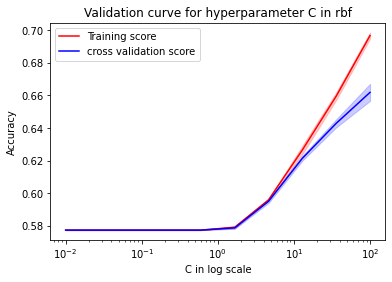

100.0


In [22]:

# Graphing helper
def val_curve(param_range, train_scores, valid_scores, model_name):
    mean_train_scores = np.mean(train_scores, axis=1)
    std_train_scores = np.std(train_scores, axis=1)
    mean_valid_scores = np.mean(valid_scores, axis=1)
    std_valid_scores = np.std(valid_scores, axis=1)
    plt.semilogx(param_range, mean_train_scores, label="Training score",
                 color='red')
    plt.fill_between(param_range, mean_train_scores - std_train_scores,
                     mean_train_scores + std_train_scores, alpha=0.2,
                     color="red")

    plt.semilogx(param_range, mean_valid_scores,
                 label="cross validation score",
                 color='blue')
    plt.fill_between(param_range, mean_valid_scores - std_valid_scores,
                     mean_valid_scores + std_valid_scores, alpha=0.2,
                     color="blue")

    plt.legend(loc='best')
    plt.title(f"Validation curve for hyperparameter C in {model_name}")
    plt.xlabel("C in log scale")
    plt.ylabel("Accuracy")
    plt.show()
    best_C = param_range[mean_valid_scores.argmax()]
    print(best_C)


val_curve(param_range, train_scores_rbf, valid_scores_rbf, "rbf")

In [ ]:

# Random Forests

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"n_estimators": [10, 25, 50, 75, 100, 150, 200],
              "max_depth": [10, 25, 50, 75, 100, 150, 200],
              "criterion": ["entropy", "gini"],
              }
grd = GridSearchCV(estimator=RandomForestClassifier(random_state=1, n_jobs=-1),
                   param_grid=parameters, n_jobs=-1, cv=3)
grd.fit(x_train, y_train)
print(grd.best_params_)


In [ ]:

## Instantiate Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

random_forest = RandomForestClassifier(
    random_state=1,
    n_jobs=-1,
    criterion="gini",
    max_depth=75,
    n_estimators=150).fit(x_train, y_train)

print(random_forest.score(x_train, y_train))
print(random_forest.score(x_test, y_test))
print(classification_report(y_test, random_forest.predict(x_test)))

## Logistic Regression

In [ ]:
# use grid search find optimal c for logistic regression
from sklearn.model_selection import GridSearchCV

param_lr = {'C': [0.01, 0.1, 0.5, 1, 5, 10, 100],
            'multi_class': ['multinomial', 'ovr'],
            }
gs_lr = GridSearchCV(LogisticRegression(), param_lr, cv=5, n_jobs=1,
                     verbose=11)
print("Performing grid search...")
print("parameters:")
print(param_lr)

gs_lr.fit(x_train, y_train)
print("Best score: 40. 3f" % gs_lr.best_score_)
print("Best parameters set:")

best_param_lr = gs_lr.best_estimator_.get_params()

for param_name in sorted(param_lr.keys()):
    print("\t%s: %r" % (param_name, best_param_lr[param_name]))

In [ ]:
lr_scores = gs_lr.cv_results_['mean_test_score'].reshape(7, 2)
sns.heatmap(lr_scores, xticklabels=param_lr['multi_class'],
            yticklabels=param_lr['C'], cmap='Blues')

b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.title("Grid Search results of Logistic Regression")
plt.xlabel("multi class")
plt.ylabel("C")
plt.show()

In [ ]:
# logistic heatmap
lr = LogisticRegression(C=1).fit(x_train, y_train)
lr_pred = lr.predict(x_test)

matrix_lr = confusion_matrix(y_test, lr_pred)
print(classification_report(y_test, lr_pred))
sns.heatmap(matrix_lr, cmap='Blues', annot=True, fmt='d')
plt.title("Logistic Regression confusion matrix and heatmap")
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")

### Ensemble models

In [ ]:
#voting
base_classifiers = [('sgd', SGDClassifier()),
                    ('dt', DecisionTreeClassifier()),
                    ('lr', LogisticRegression(C=1, multi_class='multinomial')),
                    ('mnb', MultinomialNB()),
                    (' svc', LinearSVC(C=10))]
voting = VotingClassifier(estimators=base_classifiers, voting='hard')
voting.fit(x_train, y_train)
print("voting accuracy")
cross_val_score(voting, x_train, y_train, cv=5).mean(), voting.score(x_test,
                                                                     y_test)

In [ ]:
# bagging
DT = DecisionTreeClassifier()
bagging_one = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                n_estimators=10,
                                max_samples=1.0, max_features=1.0)
bagging_two = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                n_estimators=10,
                                max_samples=0.5, max_features=1.0)
bagging_three = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                  n_estimators=10,
                                  max_samples=0.5, max_features=0.5)

DT.fit(x_train, y_train)
bagging_one.fit(x_train, y_train)
bagging_two.fit(x_train, y_train)
bagging_three.fit(x_train, y_train)

print("DT:", DT.score(x_test, y_test))
print("Option 1: bagging Accuracy:", bagging_one.score(x_test, y_test))
print("Option 2: bagging Accuracy:", bagging_two.score(x_test, y_test))
print("Option 3: bagging Accuracy:", bagging_three.score(x_test, y_test))

In [ ]:
from sklearn.ensemble import VotingClassifier

#voting
base_classifiers = [('sgd', SGDClassifier()),
                    ('dt', DecisionTreeClassifier()),
                    ('lr',
                     LogisticRegression(C=0.5, multi_class='multinomial')),
                    ('mnb', MultinomialNB()),
                    (' svc', LinearSVC(C=10))]
voting = VotingClassifier(estimators=base_classifiers, voting='hard')

voting.fit(kbest_train_X.todense(), Y_train)

prediction = voting.predict(kbest_test_X.todense())
#print("Stacker predict done")

print(prediction)
pre = pd.DataFrame(prediction, columns=['sentiment'], index=test_data['id'])
pre.index.name = 'id'
pre.to_csv(r"voting_prediction_cv.csv")

In [ ]:
#random forest
rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, verbose=1).fit(
    x_train, y_train)
print(rf.score(x_test, y_test))

rf = RandomForestClassifier(n_jobs=-1, n_estimators=10, verbose=1).fit(x_train,
                                                                       y_train)
print(rf.score(x_test, y_test))

rf_pred = rf.predict(x_test)
matrix_rf = confusion_matrix(y_test, rf_pred)

print(matrix_rf)
sns.heatmap(matrix_rf, cmap='Greens', annot=True, fmt='d')
plt.title("Random Forest confusion matrix and heatmap")
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")

#ada
ada = AdaBoostClassifier().fit(x_train, y_train)
print(ada.score(x_test, y_test))

In [ ]:
# stacking code from prac 8
np.random.seed(1)


class StackingClassifier():

    def __init__(self, classifiers, metaclassifier):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        X_meta = self._predict_base(X)
        self.metaclassifier.fit(X_meta, y)

    def _predict_base(self, X):
        yhats = []
        for clf in self.classifiers:
            yhat = clf.predict_proba(X)
            yhats.append(yhat)
        yhats = np.concatenate(yhats, axis=1)
        assert yhats.shape[0] == X.shape[0]
        return yhats

    def predict(self, X):
        X_meta = self._predict_base(X)
        yhat = self.metaclassifier.predict(X_meta)
        return yhat

    def score(self, X, y):
        yhat = self.predict(X)
        return accuracy_score(y, yhat)

In [ ]:
# base calssifier to be chosen # lr/multinomial
classifiers = [LogisticRegression(),
               MultinomialNB()]
titles = ['Logistic Regression',
          'Multinomial NB']

# three meta classifiers
meta_classifier_lr = LogisticRegression(C=1)
stacker_lr = StackingClassifier(classifiers, meta_classifier_lr)

meta_classifier_mnb = MultinomialNB()
stacker_mnb = StackingClassifier(classifiers, meta_classifier_mnb)

meta_classifier_svc = LinearSVC(C=10)
stacker_svc = StackingClassifier(classifiers, meta_classifier_svc)

In [ ]:
start = time.time()
stacker_lr.fit(x_train.todense(), y_train)
end = time.time()
t = end - start
acc_lr = stacker_lr.score(x_test.todense(), y_test)
print('\nStacker Accuracy (Logistic Regression):', acc_lr, 'Time:', t)

start = time.time()
stacker_mnb.fit(x_train.todense(), y_train)
end = time.time()
t = end - start
acc_mnb = stacker_mnb.score(x_test.todense(), y_test)
print('\nStacker Accuracy (Multinomial Regression):', acc_mnb, 'Time:', t)

start = time.time()
stacker_svc.fit(x_train.todense(), y_train)
end = time.time()
t = end - start
acc_svc = stacker_svc.score(x_test.todense(), y_test)
print('\nStacker Accuracy (LinearSVC):', acc_svc, 'Time:', t)


### Prediction

In [ ]:
stacker_lr.fit(kbest_train_X.todense(), Y_train)
stacker_svc.fit(kbest_train_X.todense(), Y_train)

prediction = stacker_svc.predict(kbest_test_X.todense())
pre = pd.DataFrame(prediction, columns=['sentiment'], index=test_data['id'])
pre.index.name = 'id'
pre.to_csv(r"svc_stacker_prediction_cv.csv")

prediction = stacker_lr.predict(kbest_test_X.todense())
pre = pd.DataFrame(prediction, columns=['sentiment'], index=test_data['id'])
pre.index.name = 'id'
pre.to_csv(r"lr_stacker_prediction_cv.csv")